In [1]:
# import libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import StandardScaler , OneHotEncoder

# load the dataset 
df = sns.load_dataset('titanic')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [3]:
columns = df.columns
for i, col in enumerate(columns):
    print(i, col)

0 survived
1 pclass
2 sex
3 age
4 sibsp
5 parch
6 fare
7 embarked
8 class
9 who
10 adult_male
11 deck
12 embark_town
13 alive
14 alone


In [ ]:
# process the data
# Select the features for SVD
feature = ['pclass', 'sex', 'age', 'fare', 'survived']

# Pipline for Numerical features
numeric_features = ['pclass', 'age', 'fare']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Pipline for Categorical features
categorical_features = ['pclass', 'sex']
categorical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Apply the preprocessor
X = preprocessor.fit_transform(df[feature])

In [5]:
X.shape

(891, 8)

In [6]:
X

array([[ 0.82737724, -0.56573646, -0.50244517, ...,  1.        ,
         0.        ,  1.        ],
       [-1.56610693,  0.66386103,  0.78684529, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.82737724, -0.25833709, -0.48885426, ...,  1.        ,
         1.        ,  0.        ],
       ...,
       [ 0.82737724, -0.1046374 , -0.17626324, ...,  1.        ,
         1.        ,  0.        ],
       [-1.56610693, -0.25833709, -0.04438104, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.82737724,  0.20276197, -0.49237783, ...,  1.        ,
         0.        ,  1.        ]])

In [8]:
# perform SVD 
svd = TruncatedSVD(n_components=4)
Y = svd.fit_transform(X)

print('Singular Values:', svd.singular_values_)
print('Explained Variance Ration:', svd.explained_variance_ratio_)


Singular Values: [42.36426622 29.93266486 28.55773549 20.7594668 ]
Explained Variance Ration: [0.48705146 0.09292009 0.16594869 0.11690609]


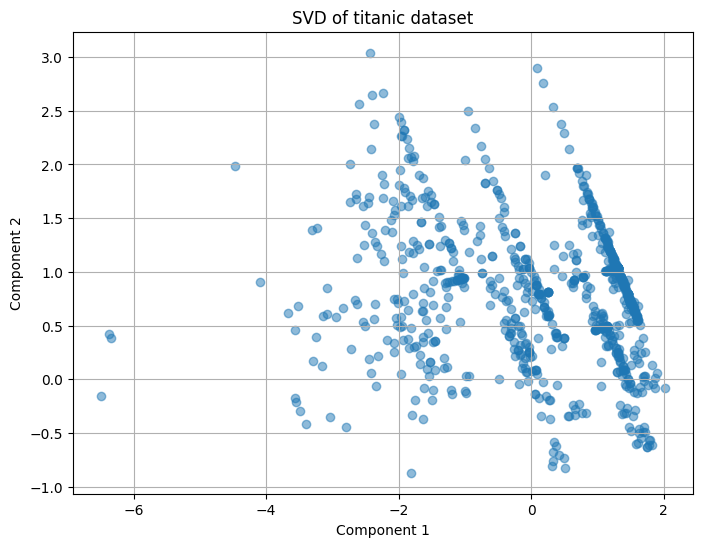

In [11]:
import matplotlib.pyplot as plt
# Assuming Y is the result from SVD with 2 components
plt.figure(figsize=(8,6))
plt.scatter(Y[:,0],Y[:,1], alpha=0.5)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('SVD of titanic dataset')
plt.grid(True)
plt.show()  

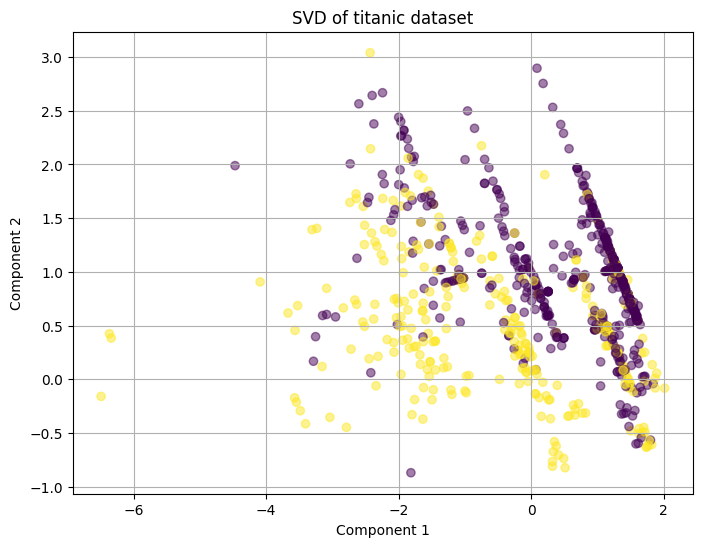

In [14]:
# Assuming Y is the result from SVD with 2 components
plt.figure(figsize=(8,6))
plt.scatter(Y[:,0],Y[:,1], alpha=0.5, c=df['survived'])
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('SVD of titanic dataset')
plt.grid(True)
plt.show() 

3